# Importing packages

In [2]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

# Loading the dataset

###  Triplets file

In [3]:
triplet=pd.read_csv('C:/Users/every/Downloads/innomatics/project/data/kaggle/kaggle_visible_evaluation_triplets.txt',sep='\t',names=['user_id','song_id','freq'])

In [4]:
triplet.shape

(1450933, 3)

### Track file

In [5]:
track=pd.read_csv('C:/Users/every/Downloads/innomatics/project/data/kaggle/unique_tracks.txt',sep='<SEP>',names= ['track', 'song_id', 'title' ,'artist_name'])

In [6]:
track.shape

(1000000, 4)

# Combine both datasets

In [7]:
song_df = pd.merge(triplet, track.drop_duplicates(['song_id']), on = 'song_id')

In [8]:
song_df.head()


,user_id,song_id,freq,track,title,artist_name
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
1,c34670d9c1718361feb93068a853cead3c95b76a,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
2,c5006d9f41f68ccccbf5ee29212b6af494110c5e,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
3,e4332e11f4df6dd26673bb6b085e9a2bbdc9b8a5,SOBONKR12A58A7A7E0,2,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
4,baf2fe5885ab93fbbdb7fecc6691788e70afb6c8,SOBONKR12A58A7A7E0,4,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One


In [9]:
song_df.shape

(1450933, 6)

In [10]:
song_df.describe()

,freq
count,1.450933e+06
mean,3.187149e+00
std,7.051664e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,3.000000e+00
max,9.230000e+02


In [11]:
song_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450933 entries, 0 to 1450932
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   user_id      1450933 non-null  object
 1   song_id      1450933 non-null  object
 2   freq         1450933 non-null  int64 
 3   track        1450933 non-null  object
 4   title        1450933 non-null  object
 5   artist_name  1450932 non-null  object
dtypes: int64(1), object(5)
memory usage: 77.5+ MB


In [12]:
song_df.isnull().sum()

user_id        0
song_id        0
freq           0
track          0
title          0
artist_name    1
dtype: int64

# Data Preprocessing

In [13]:
song_df['song'] = song_df['title']+' - '+song_df['artist_name']
song_df.head()

,user_id,song_id,freq,track,title,artist_name,song
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One,Dwight Yoakam - You're The One
1,c34670d9c1718361feb93068a853cead3c95b76a,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One,Dwight Yoakam - You're The One
2,c5006d9f41f68ccccbf5ee29212b6af494110c5e,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One,Dwight Yoakam - You're The One
3,e4332e11f4df6dd26673bb6b085e9a2bbdc9b8a5,SOBONKR12A58A7A7E0,2,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One,Dwight Yoakam - You're The One
4,baf2fe5885ab93fbbdb7fecc6691788e70afb6c8,SOBONKR12A58A7A7E0,4,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One,Dwight Yoakam - You're The One


# Basic statistics

In [14]:
print("Toatal no of users:",song_df['user_id'].nunique())
print("Toatal no of songID:",song_df['song_id'].nunique())
print("Toatal no of freq:",song_df['freq'].nunique())
print("Toatal no of track:",song_df['track'].nunique())
print("Toatal no of title:",song_df['title'].nunique())
print("Toatal no of artist:",song_df['artist_name'].nunique())
print("Toatal no of song:",song_df['song'].nunique())

Toatal no of users: 110000
Toatal no of songID: 163206
Toatal no of freq: 299
Toatal no of track: 163206
Toatal no of title: 28361
Toatal no of artist: 137622
Toatal no of song: 162043


# Most popular songs

In [15]:
song_grouped = song_df.groupby(['song']).agg({'freq':'count'}).reset_index()


In [16]:
grouped_sum = song_grouped['freq'].sum()
song_grouped['percentage'] = (song_grouped['freq'] / grouped_sum ) * 100
df=song_grouped.sort_values(['freq', 'song'], ascending=[0,1])
df.head(10)

,song,freq,percentage
59878,Harmonia - Sehr kosmisch,5043,0.347570
17175,Björk - Undo,4483,0.308974
42714,Dwight Yoakam - You're The One,4136,0.285058
51326,Florence + The Machine - Dog Days Are Over (Ra...,3780,0.260522
77664,Kings Of Leon - Revelry,3672,0.253079
104295,OneRepublic - Secrets,3430,0.236400
13348,Barry Tuckwell/Academy of St Martin-in-the-Fie...,3272,0.225510
151720,Train - Hey_ Soul Sister,2791,0.192359
27290,Charttraxx Karaoke - Fireflies,2725,0.187810
25696,Cartola - Tive Sim,2668,0.183882


# Most popular songs

In [17]:
df.head(10)

,song,freq,percentage
59878,Harmonia - Sehr kosmisch,5043,0.347570
17175,Björk - Undo,4483,0.308974
42714,Dwight Yoakam - You're The One,4136,0.285058
51326,Florence + The Machine - Dog Days Are Over (Ra...,3780,0.260522
77664,Kings Of Leon - Revelry,3672,0.253079
104295,OneRepublic - Secrets,3430,0.236400
13348,Barry Tuckwell/Academy of St Martin-in-the-Fie...,3272,0.225510
151720,Train - Hey_ Soul Sister,2791,0.192359
27290,Charttraxx Karaoke - Fireflies,2725,0.187810
25696,Cartola - Tive Sim,2668,0.183882


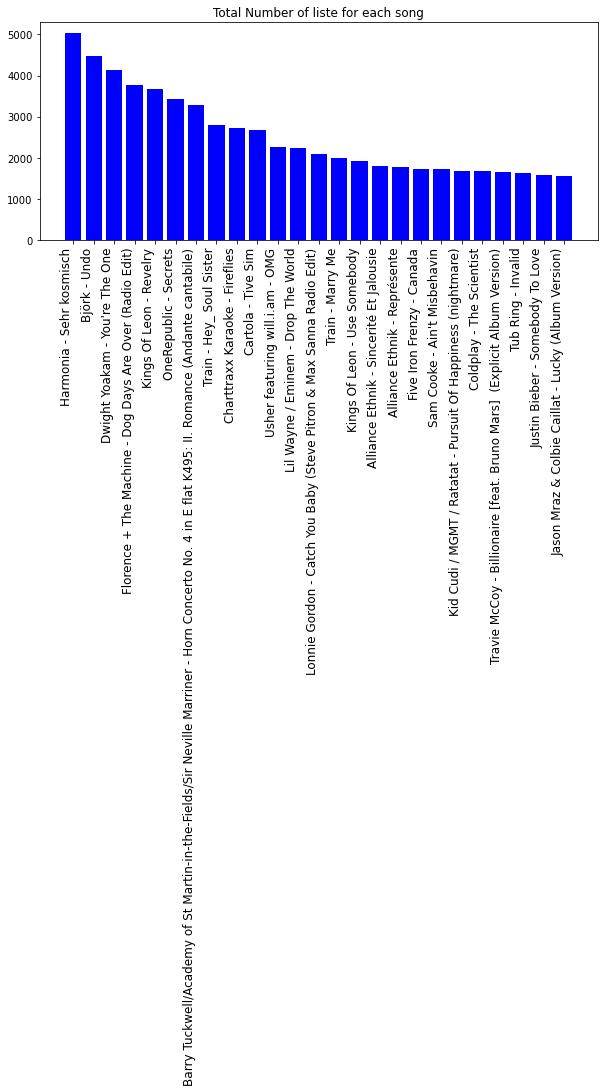

In [18]:
plt.figure(figsize =(10, 4))
ax=plt.subplot()
ax.bar(df.song.head(25),df['freq'].head(25),color='b')
ax.set_xticklabels(df.song,rotation=90,fontsize='12',horizontalalignment="right")
ax.set_title("Total Number of liste for each song")
plt.show()

# Popularity based Recommendation using code

In [19]:
def popularity(train,title,user_id):
    train_data_grouped = train.groupby([title]).agg({user_id: 'count'}).reset_index()
    train_data_grouped.rename(columns = {'user_id': 'score'},inplace=True)
    train_data_sort=train_data_grouped.sort_values(['score',title],ascending=[0,1])
    train_data_sort['Rank'] = train_data_sort['score'].rank(ascending=0, method='first')
    popularity_recommendations=train_data_sort.head(20)
    return popularity_recommendations

In [20]:
popularity(song_df,'song','user_id')

,song,score,Rank
59878,Harmonia - Sehr kosmisch,5043,1.0
17175,Björk - Undo,4483,2.0
42714,Dwight Yoakam - You're The One,4136,3.0
51326,Florence + The Machine - Dog Days Are Over (Ra...,3780,4.0
77664,Kings Of Leon - Revelry,3672,5.0
104295,OneRepublic - Secrets,3430,6.0
13348,Barry Tuckwell/Academy of St Martin-in-the-Fie...,3272,7.0
151720,Train - Hey_ Soul Sister,2791,8.0
27290,Charttraxx Karaoke - Fireflies,2725,9.0
25696,Cartola - Tive Sim,2668,10.0


# Popularity based Recommendation using oops 

In [21]:
import Recommender

In [22]:
pr = Recommender.popularity_recommender_py()

In [23]:
pr.create(song_df, 'user_id', 'song')

In [24]:
pr.recommend(song_df['user_id'][2])

,user_id,song,score,Rank
59878,c5006d9f41f68ccccbf5ee29212b6af494110c5e,Harmonia - Sehr kosmisch,5043,1.0
17175,c5006d9f41f68ccccbf5ee29212b6af494110c5e,Björk - Undo,4483,2.0
42714,c5006d9f41f68ccccbf5ee29212b6af494110c5e,Dwight Yoakam - You're The One,4136,3.0
51326,c5006d9f41f68ccccbf5ee29212b6af494110c5e,Florence + The Machine - Dog Days Are Over (Ra...,3780,4.0
77664,c5006d9f41f68ccccbf5ee29212b6af494110c5e,Kings Of Leon - Revelry,3672,5.0
104295,c5006d9f41f68ccccbf5ee29212b6af494110c5e,OneRepublic - Secrets,3430,6.0
13348,c5006d9f41f68ccccbf5ee29212b6af494110c5e,Barry Tuckwell/Academy of St Martin-in-the-Fie...,3272,7.0
151720,c5006d9f41f68ccccbf5ee29212b6af494110c5e,Train - Hey_ Soul Sister,2791,8.0
27290,c5006d9f41f68ccccbf5ee29212b6af494110c5e,Charttraxx Karaoke - Fireflies,2725,9.0
25696,c5006d9f41f68ccccbf5ee29212b6af494110c5e,Cartola - Tive Sim,2668,10.0
